In [28]:
import os
import pandas as pd
# Load the raw and enriched datasets
raw_file = '../data/raw/health_records.csv'
enriched_file = '../data/transformed/cleaned_health_records.csv'

df_raw = pd.read_csv(raw_file, parse_dates=['visit_date'])
df_enriched = pd.read_csv(enriched_file, parse_dates=['visit_date'])

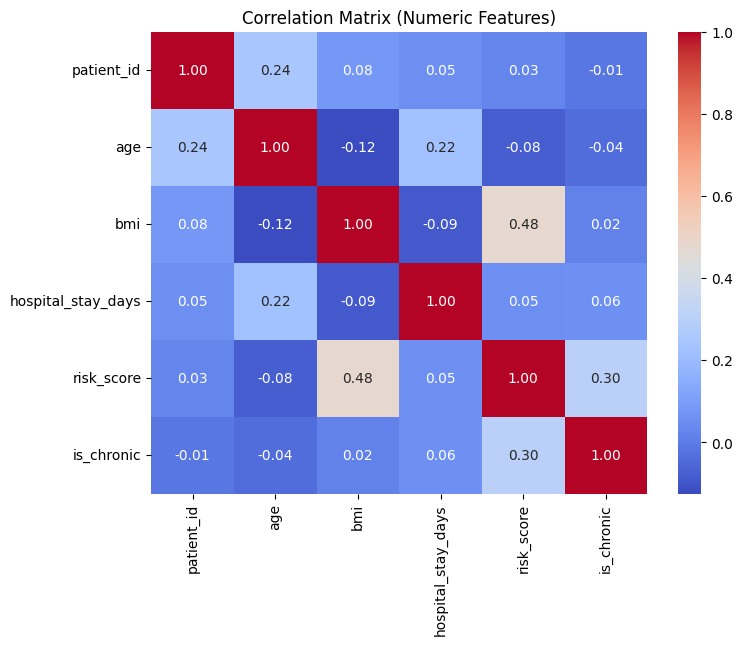

In [29]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_cols = df_enriched.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

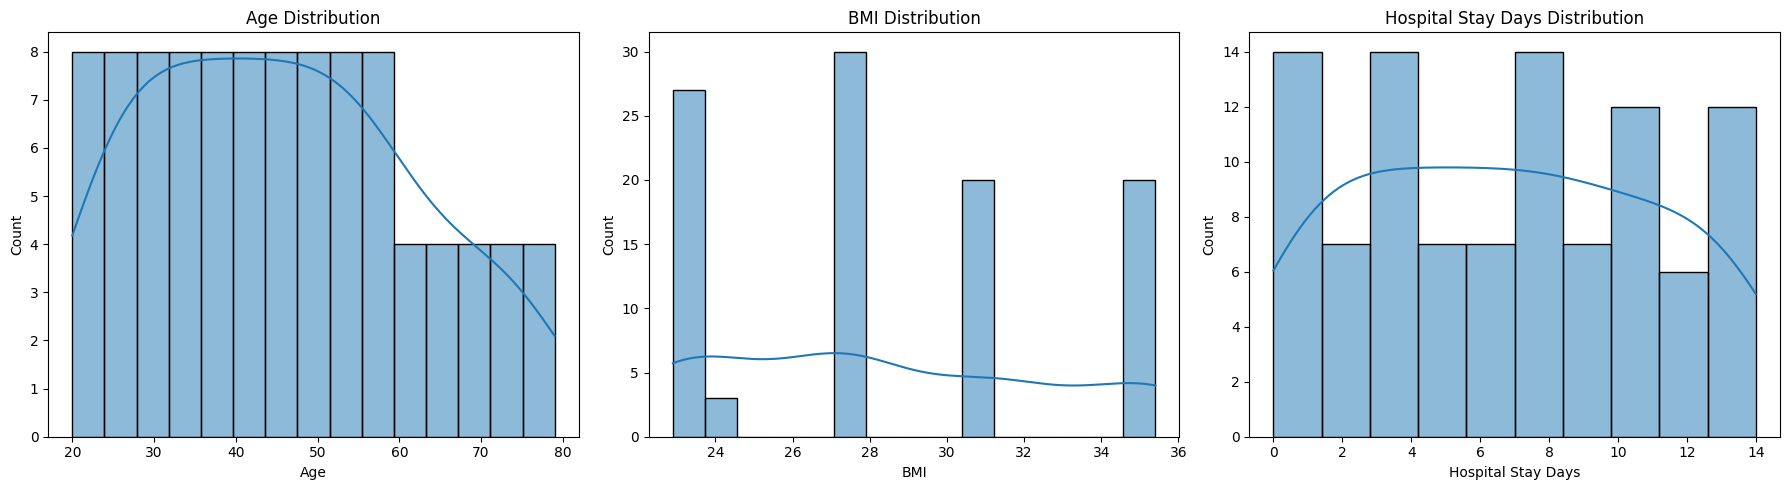

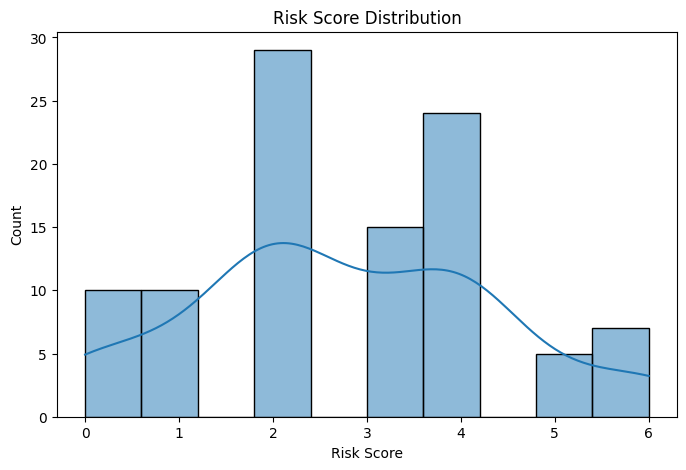

In [30]:
# Plot distributions of selected numeric features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_enriched['age'], bins=15, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')

sns.histplot(df_enriched['bmi'], bins=15, kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('BMI')

sns.histplot(df_enriched['hospital_stay_days'], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Hospital Stay Days Distribution')
axes[2].set_xlabel('Hospital Stay Days')

plt.tight_layout()
plt.show()

# Plot the distribution of risk_score
plt.figure(figsize=(8, 5))
sns.histplot(df_enriched['risk_score'], bins=10, kde=True)
plt.title('Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Count')
plt.show()

,age,bmi,hospital_stay_days,risk_score
is_chronic,,,,
0,46.393939,28.363636,6.393939,2.060606
1,45.059701,28.523881,6.925373,3.104478


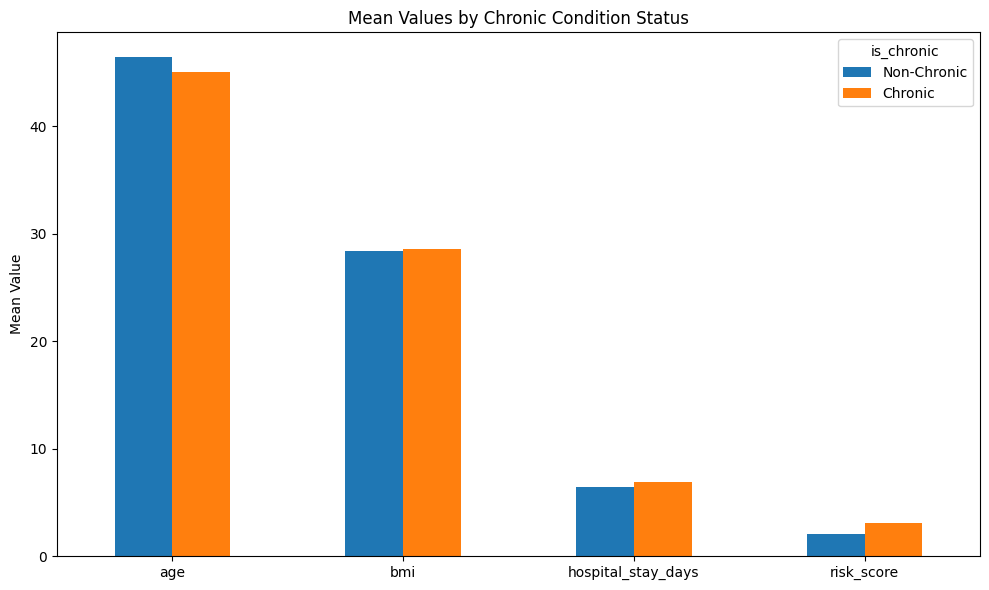

In [ ]:
# Compare mean values of numeric features between chronic and non-chronic patients
group_means = df_enriched.groupby('is_chronic')[['age', 'bmi', 'hospital_stay_days', 'risk_score']].mean()
display(group_means)

# Visualize group comparisons
group_means.T.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Chronic Condition Status')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(['Non-Chronic', 'Chronic'], title='is_chronic')
plt.tight_layout()
plt.show()



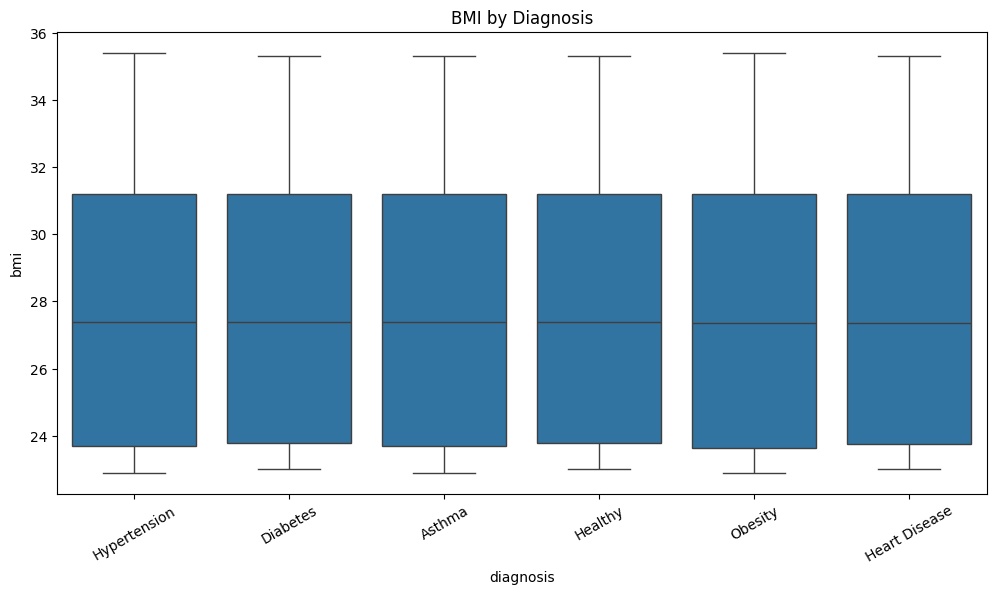

                count  mean       std  min  25%  50%  75%  max
smoking_status                                                
Non-smoker       50.0  1.74  1.242282  0.0  1.0  2.0  2.0  4.0
Smoker           50.0  3.78  1.282377  2.0  3.0  4.0  4.0  6.0


In [31]:
# Group comparison: BMI by diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(x='diagnosis', y='bmi', data=df_enriched)
plt.title('BMI by Diagnosis')
plt.xticks(rotation=30)
plt.show()

# Statistical summary: Compare risk_score by smoking_status
grouped = df_enriched.groupby('smoking_status')['risk_score'].describe()
print(grouped)